In [3]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"{'✅ GPU is available and will be used.' if torch.cuda.is_available() else '⚠️ Using CPU'}")

# Define paths
source_folder = r'C:\Users\hchau\OneDrive\Desktop\jwenf'  # Folder where images are located
destination_folder = r'C:\Users\hchau\OneDrive\Desktop\jwenf\Train_Test'  # Where the train/test folders will be created

# Create directories for training and testing splits
train_dir = os.path.join(destination_folder, 'train')
test_dir = os.path.join(destination_folder, 'test')

# Create subdirectories for normal and TB
os.makedirs(os.path.join(train_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'TB'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'TB'), exist_ok=True)

# Image filenames and corresponding labels
normal_images = [f for f in os.listdir(os.path.join(source_folder, 'normal')) if f.endswith(('.jpg','.png'))]
tb_images = [f for f in os.listdir(os.path.join(source_folder, 'TB')) if f.endswith(('.jpg','.png'))]

# Combine filenames and labels
image_labels = [(os.path.join('normal', img), 'normal') for img in normal_images] + \
               [(os.path.join('TB', img), 'TB') for img in tb_images]

# Split into train and test
train_data, test_data = train_test_split(image_labels, test_size=0.2, random_state=42)

# Function to move images to their respective directories
def move_images(data, split_type):
    for img, label in data:
        # Define source and destination paths
        source_path = os.path.join(source_folder, img)
        dest_path = os.path.join(destination_folder, split_type, label, os.path.basename(img))

        # Move the image
        shutil.copy(source_path, dest_path)

# Move images to the corresponding train/test directories
move_images(train_data, 'train')
move_images(test_data, 'test')

print("Images have been split into train and test folders.")

✅ GPU is available and will be used.
Images have been split into train and test folders.


In [4]:
import cv2

In [5]:
train_path=r"C:\Users\hchau\OneDrive\Desktop\jwenf\Train_Test\train"
test_path=r"C:\Users\hchau\OneDrive\Desktop\jwenf\Train_Test\test"

x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(28,28))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(28,28))

        x_test.append(img_arr)


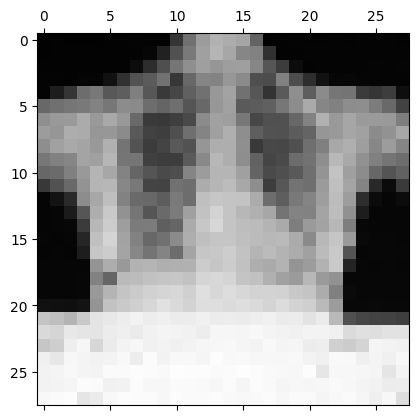

In [6]:
import matplotlib.pyplot as plt
plt.matshow(x_train[0])

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path=r"C:\Users\hchau\OneDrive\Desktop\jwenf\Train_Test\train"
test_path=r"C:\Users\hchau\OneDrive\Desktop\jwenf\Train_Test\test"

# Initialize ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=5356,
    class_mode='categorical',  # For multi-class labels
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=1339,
    class_mode='categorical',
    shuffle=False
)

# Now, get the data as numpy arrays
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)


# You can get more batches if necessary using a loop or by iterating over the generator

Found 5356 images belonging to 2 classes.
Found 1339 images belonging to 2 classes.


In [8]:
import numpy as np

# Reset the generators to ensure we start from the beginning
train_generator.reset()
test_generator.reset()

# Get total number of samples
train_sample_count = train_generator.samples
test_sample_count = test_generator.samples

# Get class indices (optional, maps class names to indices)
class_indices = train_generator.class_indices
print("Class indices:", class_indices)

# Collect all labels (y_train and y_test)
y_train = []
for _ in range(len(train_generator)):
    _, labels = next(train_generator)
    y_train.append(labels)

y_test = []
for _ in range(len(test_generator)):
    _, labels = next(test_generator)
    y_test.append(labels)

# Concatenate batches into single array
y_train = np.concatenate(y_train)
y_test = np.concatenate(y_test)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Class indices: {'TB': 0, 'normal': 1}
y_train shape: (5356, 2)
y_test shape: (1339, 2)


In [9]:
x_train[1].shape

(28, 28, 3)

In [10]:
y_train[1]

array([1., 0.], dtype=float32)

In [11]:
y_train[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [12]:
import numpy as np
x_train = np.array(x_train)
x_test= np.array(x_test)
x_train = x_train / 255.0
x_test=x_test/255.0

In [13]:
print(x_train.shape)

(5356, 28, 28, 3)


In [14]:
x1=x_train/255

In [15]:
x2=x_test/255

In [16]:
# CNN
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(( 28, 28, 3))),  # Replace with your actual image size
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Use 2 for binary classification with categorical labels
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical_crossentropy if your labels are one-hot
    metrics=['accuracy']
)
model.fit(x1, y_train, epochs=5)

Epoch 1/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5144 - loss: 0.6929
Epoch 2/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5198 - loss: 0.6927
Epoch 3/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5174 - loss: 0.6927
Epoch 4/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5268 - loss: 0.6921
Epoch 5/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5170 - loss: 0.6926


In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(28, 28, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Add more filters
    layers.MaxPooling2D(2, 2),  # Another pooling layer
    layers.Conv2D(128, (3, 3), activation='relu'),  # Another convolution layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Larger dense layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(2, activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For one-hot labels
    metrics=['accuracy']
)
model.fit(x1, y_train, epochs=10, batch_size=32)  # Increase epochs and use a smaller batch size

Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4846 - loss: 0.6934
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5128 - loss: 0.6930
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5086 - loss: 0.6933
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5160 - loss: 0.6928
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5148 - loss: 0.6927
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5182 - loss: 0.6925
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5144 - loss: 0.6928
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5275 - loss: 0.6920
Epoch 9/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5250 - loss: 0.6921
Epoch 10/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5202 - loss: 0.6926


In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Use a smaller learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x1, y_train, epochs=10, batch_size=32) 

Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5087 - loss: 0.6932
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5117 - loss: 0.6930
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5089 - loss: 0.6930
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5130 - loss: 0.6928
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5027 - loss: 0.6937
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5189 - loss: 0.6926
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5196 - loss: 0.6926
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5136 - loss: 0.6927
Epoch 9/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5132 - loss: 0.6928
Epoch 10/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5143 - loss: 0.6930


In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    layers.Input(shape=(28, 28, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(2, activation='softmax')  # Output layer for binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',  # For one-hot labels
    metrics=['accuracy']
)

# Assuming x1 and y_train are properly prepared
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(x1, y_train, batch_size=32)

# Train the model for 50 epochs
model.fit(train_generator, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
  5/168 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5197 - loss: 0.6928

C:\Users\hchau\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5174 - loss: 0.6929 - val_accuracy: 0.6617 - val_loss: 0.6874
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5097 - loss: 0.6929 - val_accuracy: 0.5011 - val_loss: 0.6881
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5101 - loss: 0.6932 - val_accuracy: 0.5056 - val_loss: 0.6878
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5111 - loss: 0.6929 - val_accuracy: 0.5870 - val_loss: 0.6877
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5173 - loss: 0.6927 - val_accuracy: 0.5848 - val_loss: 0.6878
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5113 - loss: 0.6930 - val_accuracy: 0.5870 - val_loss: 0.6879
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5128 - loss: 0.6927 - val_accuracy: 0.5138 - val_loss: 0.6881
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5100 - loss: 0.6929 - val_accuracy: 0.672

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Initialize ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224 as ResNet50 expects this size
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the ResNet50 model with pre-trained weights (excluding the top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
model = models.Sequential([
    base_model,  # Pre-trained ResNet50 model as the base
    layers.GlobalAveragePooling2D(),  # Global average pooling
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Binary classification with softmax
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Use a small learning rate for fine-tuning
    loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")


Found 5356 images belonging to 2 classes.
Found 1339 images belonging to 2 classes.
Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.5213 - loss: 0.8002 - val_accuracy: 0.5049 - val_loss: 0.6308
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6585 - loss: 0.6317 - val_accuracy: 0.9066 - val_loss: 0.5574
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.7867 - loss: 0.5694 - val_accuracy: 0.9178 - val_loss: 0.5017
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.8237 - loss: 0.5288 - val_accuracy: 0.9208 - val_loss: 0.4465
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8405 - loss: 0.4857 - val_accuracy: 0.9164 - val_loss: 0.4076
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.8519 - loss: 0.4458 - val_accuracy: 0.9231 - val_loss: 0.3660
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8566 - loss: 0.4137 - val_accuracy: 0.9276 - val_loss: 0.3301
Epoch 8/10
16

In [21]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import numpy as np

# Get true labels and predicted probabilities
y_true = test_generator.classes
y_pred_proba = model.predict(test_generator)
y_pred = np.argmax(y_pred_proba, axis=1)

# Classification report
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# AUC score (one-vs-rest, works for multi-class too)
if y_pred_proba.shape[1] == 2:
    auc = roc_auc_score(y_true, y_pred_proba[:, 1])
else:
    # For multi-class use one-vs-rest approach
    from sklearn.preprocessing import label_binarize
    y_true_bin = label_binarize(y_true, classes=list(range(y_pred_proba.shape[1])))
    auc = roc_auc_score(y_true_bin, y_pred_proba, average='macro', multi_class='ovr')

print(f"AUC Score: {auc:.4f}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step 
              precision    recall  f1-score   support

          TB       0.94      0.95      0.94       676
      normal       0.94      0.93      0.94       663

    accuracy                           0.94      1339
   macro avg       0.94      0.94      0.94      1339
weighted avg       0.94      0.94      0.94      1339

AUC Score: 0.9870


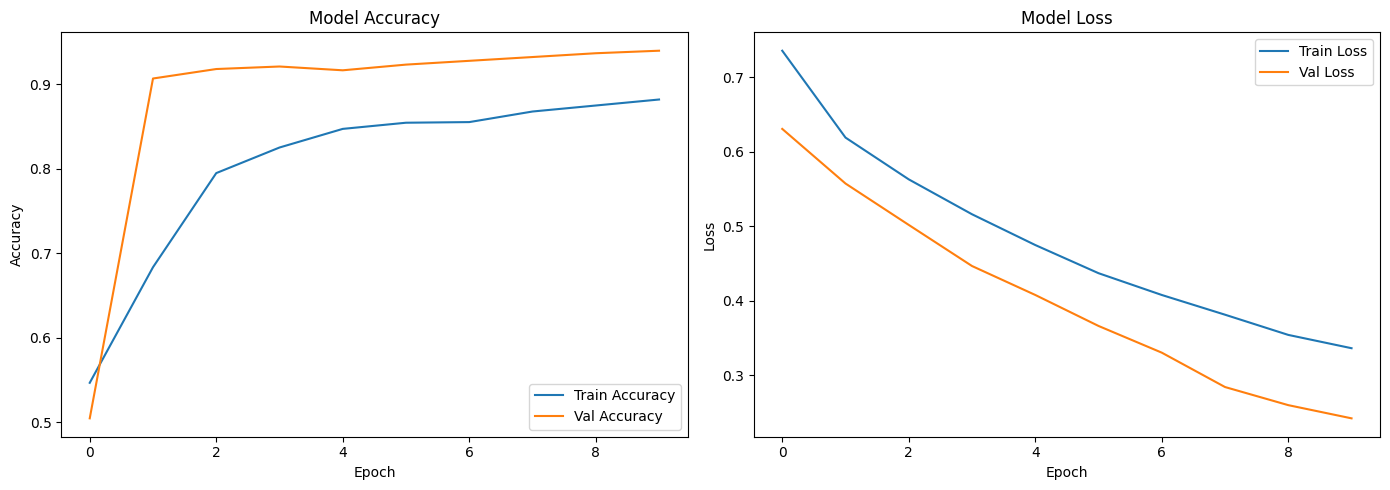

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


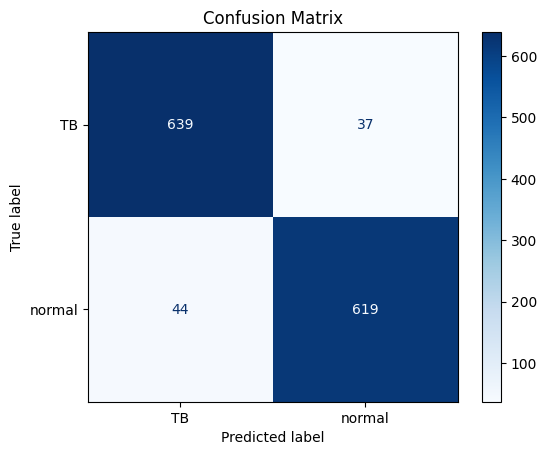

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [24]:
model.save('final_model.h5')